In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

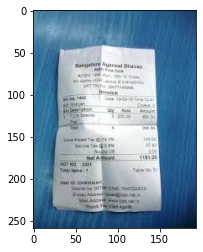

In [67]:
img = cv2.imread('input/2.jpg')
img_original = img.copy()
plt.imshow(img)

In [68]:
# Image modification
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 20, 30, 30)
edged = cv2.Canny(gray, 10, 20)

In [69]:
# Contour detection
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [70]:
def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 500:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.015 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest

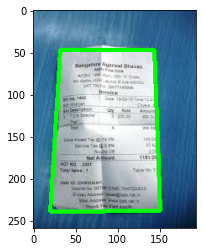

In [71]:
biggest = biggest_contour(contours)

countr= cv2.drawContours(img, [biggest], -1, (0, 255, 0), 3)
plt.imshow(countr)

In [72]:
# Pixel values in the original image
points = biggest.reshape(4, 2)
input_points = np.zeros((4, 2), dtype="float32")

points_sum = points.sum(axis=1)
input_points[0] = points[np.argmin(points_sum)]
input_points[3] = points[np.argmax(points_sum)]

points_diff = np.diff(points, axis=1)
input_points[1] = points[np.argmin(points_diff)]
input_points[2] = points[np.argmax(points_diff)]

In [73]:
(top_left, top_right, bottom_right, bottom_left) = input_points
bottom_width = np.sqrt(((bottom_right[0] - bottom_left[0]) ** 2) + ((bottom_right[1] - bottom_left[1]) ** 2))
top_width = np.sqrt(((top_right[0] - top_left[0]) ** 2) + ((top_right[1] - top_left[1]) ** 2))
right_height = np.sqrt(((top_right[0] - bottom_right[0]) ** 2) + ((top_right[1] - bottom_right[1]) ** 2))
left_height = np.sqrt(((top_left[0] - bottom_left[0]) ** 2) + ((top_left[1] - bottom_left[1]) ** 2))

In [74]:
# Output image size
max_width = max(int(bottom_width), int(top_width))
# max_height = max(int(right_height), int(left_height))
max_height = int(max_width * 1.414)  # for A4
# Desired points values in the output image
converted_points = np.float32([[0, 0], [max_width, 0], [0, max_height], [max_width, max_height]])

In [75]:
# Perspective transformation
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(img_original, matrix, (max_width, max_height))


In [76]:
kernel_sharpening = np.array([[0,-1,0], 
                                [-1, 5,-1],
                                [0,-1,0]])
  # applying the sharpening kernel to the input image & displaying it.
sharpened = cv2.filter2D(img_output, -1, kernel_sharpening)

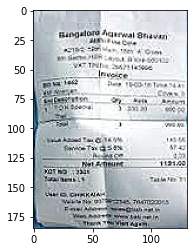

In [77]:
plt.imshow(sharpened)


In [78]:
cv2.imwrite('output/2.jpg', img_output)

True